# SplitWavAudioMubin() function splits songs into 20 seconds interval 

In [15]:
from pydub import AudioSegment
import re
AudioSegment.converter = r"C:\Users\abelf\ffmpeg-N-104359-g9b445663a5-win64-lgpl\ffmpeg-N-104359-g9b445663a5-win64-lgpl\bin\ffmpeg.exe"
AudioSegment.ffprobe =  r"C:\Users\abelf\ffmpeg-N-104359-g9b445663a5-win64-lgpl\ffmpeg-N-104359-g9b445663a5-win64-lgpl\bin\ffprobe.exe"
import math
from pydub import AudioSegment
import math
import matplotlib.pyplot as plt
import os
import numpy as np
import librosa
import pandas as pd
import openpyxl
class SplitWavAudioMubin():
    def __init__(self, folder, filename):
        self.folder = folder
        self.filename = filename
        self.filepath = folder + '\\' + filename
        
        self.audio = AudioSegment.from_mp3(self.filepath)
    
    def get_duration(self):
        return self.audio.duration_seconds
    
    def single_split(self, from_min, to_min, split_filename):
        t1 = from_min * 60 * 1000
        t2 = to_min * 60 * 1000
        split_audio = self.audio[t1:t2]
        split_audio.export(r"C:\Users\abelf\Downloads\songs-upbeat - divided"+ '\\' + split_filename, format="mp3")
        
    def multiple_split(self, min_per_split):
        total_mins = math.ceil(self.get_duration() / 20)
        for i in range(0, total_mins, min_per_split):
            split_fn =  re.sub(r'[0-9]+', '', filename).strip(".mp3") +  "_" + str(i)  + ".mp3"
            self.single_split(i, i+min_per_split, split_fn)
            print(str(i) + ' Done')
            if i == total_mins - min_per_split:
                print('All splited successfully')
    

# get client id information from spotify to perform requests using spotipy

In [16]:
import spotipy
import sys
import pandas as pd
import numpy as np
import json
import re 
import sys
import itertools
import requests
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler



import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util

import warnings
warnings.filterwarnings("ignore")
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util


#client id and secret for my application
client_id = ''
client_secret= ''
username = ''

#for avaliable scopes see https://developer.spotify.com/web-api/using-scopes/
scope = 'user-library-read playlist-modify-public playlist-read-private'

redirect_uri='https://beta.developer.spotify.com/dashboard/applications/ef60e9f2d37b4913963c7e7e9c572c96'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id , client_secret=client_secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# calculate features for the splitted songs
-TEMPO:  the speed at which a piece of music should be played 
-LOUDNESS/ ENERGY : music has a profound ability to alter the way we feel, boost energy levels, calm us down and should be influential on heart beat

In [17]:


import os
import numpy as np
import librosa
track_durations = []
track_tempo = []
track_beat_frames= []
track_beat_times = []
#directory = r'C:\Users\abelf\Downloads\songs-upbeat - divided'
songs =  []
loudness_tracks = []

def calculate_features(directory,songs, track_tempo,loudness_tracks,track_durations):
    for filename in os.listdir(directory):

        try:
            y, sr = librosa.load(directory+"\\"+filename)
            songs.append(filename)
            # Compute the track duration
            track_duration = librosa.get_duration(y=y, sr=sr)
            track_durations.append(track_duration)
            # Ext'ract tempo and beat estimates
            onset_env = librosa.onset.onset_strength(y, sr=sr)
            tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
            track_tempo.append(tempo)
            # Compute the spectrogram (magnitude)
            spec_mag = abs(librosa.stft(y,n_fft = 2048,hop_length = 1024))
            # Convert the spectrogram into dB
            spec_db = librosa.amplitude_to_db(spec_mag)
            # Compute A-weighting values
            freqs = librosa.fft_frequencies(sr=sr, n_fft=2048)
            a_weights = librosa.A_weighting(freqs)
            a_weights = np.expand_dims(a_weights, axis=1)

            # Apply the A-weghting to the spectrogram in dB
            spec_dba = spec_db + a_weights
            # Compute the "loudness" value
            loudness = librosa.feature.rms(y=y)
            
            for i in loudness:
                 summ = sum(i)/len(i)
                 loudness_tracks.append(summ)
        except:
            continue
def create_df(songs, track_tempo,track_durations, loudness_tracks):
     songs_df = {'songs':songs,
            'tempo':track_tempo,
            #'BPM': bpms,
            'Duration': track_durations,
            'Loudness':loudness_tracks
           
           }

     songs_df = pd.DataFrame(songs_df)
     
     return songs_df
    
            

# Based on the data collected, we noticed songs with higher tempo corresponds to higher heart beat( physical movement being constant) We randomized the heart rate data based on the tempo value. 

In [78]:

# generate random integer values
from random import seed
from random import randint
# seed random number generator
seed(1)
# generate some integers
#for _ in range(10):
	#value = randint(0, 10)
	#print(value)
lst = []
for col in songs_df["tempo"]:
       # print(col)
         if int(col) in range(65,75):
            lst.append(randint(65, 75)) 
         elif int(col) in range(76,85):
            lst.append(randint(75, 85))
         elif int(col) in range(86,94):
            lst.append(randint(86, 95))
         elif int(col) in range(95,110):
            lst.append(randint(96, 110))
         else:
            lst.append(randint(110, 120))
songs_df["heart_rate"] = lst
import openpyxl
songs_df.to_excel("heart_rate.xlsx")


# use a random song to calculate the feature and create the dataframe

In [18]:
import os
#directory = r'C:\Users\abelf\Downloads\songs_raw_data_ML-20211026T235932Z-001\songs_raw_data_ML'
import sys
user_input = r"C:\Users\abelf\Downloads\create_tempo"
#assert os.path.exists(user_input), "I did not find the file at, "+str(user_input)
track_durations = []
track_tempo = []
songs =  []
loudness_tracks = []
song_df = pd.DataFrame()

for filename in os.listdir(user_input):
    #if filename.endswith(".jpg") or filename.endswith(".png"):
    if '.mp3' in filename and '.wav' not in filename:
        print(filename)
        split_wav = SplitWavAudioMubin(user_input, filename)
        print("Splitting song {}...".format(filename))
        split_wav.multiple_split(1)
        print("Splitting done!\n")
        print("CALCULATE FEATURES")
        calculate_features(user_input,songs,track_tempo,loudness_tracks,track_durations)
        song_df = create_df(songs, track_tempo,track_durations,loudness_tracks)
        
print(song_df)
        

yt5s.com - Drake ft. Shaggy - Find Your Love (128 kbps).mp3
Splitting song yt5s.com - Drake ft. Shaggy - Find Your Love (128 kbps).mp3...
0 Done
1 Done
2 Done
3 Done
4 Done
5 Done
6 Done
7 Done
8 Done
9 Done
All splited successfully
Splitting done!

CALCULATE FEATURES
                                               songs           tempo  \
0  yt5s.com - Drake ft. Shaggy - Find Your Love (...  [129.19921875]   

     Duration  Loudness  
0  181.420408  0.268222  


In [19]:

songs_df = pd.read_excel(r"C:\Users\abelf\Downloads\songs_raw_data_ML\songs_raw_data_ML\heart_rate.xlsx")
songs_df

,songs,tempo,Duration,Loudness,heart_rate
0,- Battleme - Burn This Town.mp57 - Battleme -...,56.173573,60.000000,0.032652,112
1,- Battleme - Burn This Town.mp57 - Battleme -...,56.173573,60.000000,0.033782,119
2,- Battleme - Burn This Town.mp57 - Battleme -...,56.173573,60.000000,0.033946,111
3,- Battleme - Burn This Town.mp57 - Battleme -...,117.453835,4.841995,0.000021,114
4,"- Battleme - Hey Hey, My My.mp11 - Battleme -...",80.749512,60.000000,0.035301,76
...,...,...,...,...,...
216,Vaults Vultures YG.mpVaults Vultures YG_3.mp3,112.347147,52.802993,0.070936,117
217,_Jump.mp11_Ju_0.mp3,103.359375,60.000000,0.081320,99
218,_Jump.mp11_Ju_1.mp3,103.359375,60.000000,0.080964,104
219,_Jump.mp11_Ju_2.mp3,103.359375,60.000000,0.082538,106


# calculate the features, set the target and split the dataset

In [20]:
X = songs_df[["tempo","Loudness"]]
y = songs_df[["heart_rate"]]

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)

# use linear regression 

In [22]:
reg = LinearRegression().fit(X,y)

# get the score

In [23]:
reg.score(X,y)

0.3943911599655293

# predict the heart rate 

In [24]:
tempo_pre, loudness_pre = song_df["tempo"][0],song_df["Loudness"][0]

In [25]:
predicted_heart_rate =  reg.predict([[tempo_pre, loudness_pre]])

In [26]:
print("Predicted song heart rate : ", predicted_heart_rate)

Predicted song heart rate :  [[99.30253943]]


In [27]:
songs_df.to_csv("Songs_.csv")

In [28]:
file = pd.read_csv(r"C:\Users\abelf\Downloads\Songs.csv")

In [29]:
file.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,heart_rate,song_name
0,Never Be the Same,0.637,0.713,0,-4.333,1,0.0747,0.1810,0.000637,0.1370,...,129.923,audio_features,4eWQlBRaTjPPUlzacqEeoQ,spotify:track:4eWQlBRaTjPPUlzacqEeoQ,https://api.spotify.com/v1/tracks/4eWQlBRaTjPP...,https://api.spotify.com/v1/audio-analysis/4eWQ...,226973,4,112,Never Be the Same
1,Real Friends,0.726,0.304,3,-8.677,1,0.1310,0.8390,0.000000,0.0853,...,91.970,audio_features,3iq9nhbI8fcnNamxMft1uv,spotify:track:3iq9nhbI8fcnNamxMft1uv,https://api.spotify.com/v1/tracks/3iq9nhbI8fcn...,https://api.spotify.com/v1/audio-analysis/3iq9...,214387,4,95,Real Friends
2,Him & I (with Halsey),0.589,0.731,2,-6.343,1,0.0868,0.0534,0.000000,0.3080,...,87.908,audio_features,5k38wzpLb15YgncyWdTZE4,spotify:track:5k38wzpLb15YgncyWdTZE4,https://api.spotify.com/v1/tracks/5k38wzpLb15Y...,https://api.spotify.com/v1/audio-analysis/5k38...,268867,4,87,Him & I (with Halsey)
3,IDGAF,0.836,0.544,7,-5.975,1,0.0943,0.0403,0.000000,0.0824,...,97.028,audio_features,76cy1WJvNGJTj78UqeA5zr,spotify:track:76cy1WJvNGJTj78UqeA5zr,https://api.spotify.com/v1/tracks/76cy1WJvNGJT...,https://api.spotify.com/v1/audio-analysis/76cy...,217947,4,100,IDGAF
4,Into It,0.569,0.649,11,-8.175,1,0.4820,0.4510,0.000000,0.1280,...,108.770,audio_features,2gxqozTaq2NYylvS8jd57G,spotify:track:2gxqozTaq2NYylvS8jd57G,https://api.spotify.com/v1/tracks/2gxqozTaq2NY...,https://api.spotify.com/v1/audio-analysis/2gxq...,175653,4,97,Into It


In [30]:
file.rename(columns={"Unnamed: 0":"Songs"})

,Songs,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,heart_rate,song_name
0,Never Be the Same,0.637,0.713,0,-4.333,1,0.0747,0.1810,0.000637,0.1370,...,129.923,audio_features,4eWQlBRaTjPPUlzacqEeoQ,spotify:track:4eWQlBRaTjPPUlzacqEeoQ,https://api.spotify.com/v1/tracks/4eWQlBRaTjPP...,https://api.spotify.com/v1/audio-analysis/4eWQ...,226973,4,112,Never Be the Same
1,Real Friends,0.726,0.304,3,-8.677,1,0.1310,0.8390,0.000000,0.0853,...,91.970,audio_features,3iq9nhbI8fcnNamxMft1uv,spotify:track:3iq9nhbI8fcnNamxMft1uv,https://api.spotify.com/v1/tracks/3iq9nhbI8fcn...,https://api.spotify.com/v1/audio-analysis/3iq9...,214387,4,95,Real Friends
2,Him & I (with Halsey),0.589,0.731,2,-6.343,1,0.0868,0.0534,0.000000,0.3080,...,87.908,audio_features,5k38wzpLb15YgncyWdTZE4,spotify:track:5k38wzpLb15YgncyWdTZE4,https://api.spotify.com/v1/tracks/5k38wzpLb15Y...,https://api.spotify.com/v1/audio-analysis/5k38...,268867,4,87,Him & I (with Halsey)
3,IDGAF,0.836,0.544,7,-5.975,1,0.0943,0.0403,0.000000,0.0824,...,97.028,audio_features,76cy1WJvNGJTj78UqeA5zr,spotify:track:76cy1WJvNGJTj78UqeA5zr,https://api.spotify.com/v1/tracks/76cy1WJvNGJT...,https://api.spotify.com/v1/audio-analysis/76cy...,217947,4,100,IDGAF
4,Into It,0.569,0.649,11,-8.175,1,0.4820,0.4510,0.000000,0.1280,...,108.770,audio_features,2gxqozTaq2NYylvS8jd57G,spotify:track:2gxqozTaq2NYylvS8jd57G,https://api.spotify.com/v1/tracks/2gxqozTaq2NY...,https://api.spotify.com/v1/audio-analysis/2gxq...,175653,4,97,Into It
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Better When I'm Dancin',0.756,0.789,2,-7.002,1,0.0324,0.5300,0.000711,0.1570,...,127.987,audio_features,5k5fWendNngd89O8JKoE8L,spotify:track:5k5fWendNngd89O8JKoE8L,https://api.spotify.com/v1/tracks/5k5fWendNngd...,https://api.spotify.com/v1/audio-analysis/5k5f...,176267,4,118,Better When I'm Dancin'
96,Dear Future Husband,0.655,0.782,1,-4.789,1,0.1850,0.3750,0.000000,0.3170,...,79.427,audio_features,3cU2wBxuV6nFiuf6PJZNlC,spotify:track:3cU2wBxuV6nFiuf6PJZNlC,https://api.spotify.com/v1/tracks/3cU2wBxuV6nF...,https://api.spotify.com/v1/audio-analysis/3cU2...,184227,4,81,Dear Future Husband
97,Title,0.779,0.754,5,-4.358,1,0.0966,0.3430,0.000003,0.0965,...,89.998,audio_features,0k5hoseEJnCAbpRh38dNoI,spotify:track:0k5hoseEJnCAbpRh38dNoI,https://api.spotify.com/v1/tracks/0k5hoseEJnCA...,https://api.spotify.com/v1/audio-analysis/0k5h...,174733,4,91,Title
98,Close Your Eyes,0.634,0.521,7,-5.748,1,0.0389,0.1520,0.000000,0.3890,...,93.970,audio_features,2e1N4FhuB08W4iKmYpEftE,spotify:track:2e1N4FhuB08W4iKmYpEftE,https://api.spotify.com/v1/tracks/2e1N4FhuB08W...,https://api.spotify.com/v1/audio-analysis/2e1N...,220267,3,93,Close Your Eyes


# pick songs with similar heart rate value to be recommended

In [34]:
similar_hr = []
for hr in file["heart_rate"]:
    if abs(hr-predicted_heart_rate) < 5:
        similar_hr.append(hr)
print(similar_hr)
file = file[file['heart_rate'].isin(similar_hr)]   

[95, 100, 97, 96, 102, 102, 101, 99, 103, 101, 99, 100, 97, 102, 99, 100, 103, 103]


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

v=TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 6), max_features=10000)
X_names_sparse = v.fit_transform(file["song_name"])
X_names_sparse.shape

(18, 114)

In [52]:
X_names_sparse

<18x114 sparse matrix of type '<class 'numpy.float64'>'
	with 118 stored elements in Compressed Sparse Row format>

# calculate the importance of the feature 

In [ ]:


# Analyze feature importances
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

X_train = file[['acousticness','danceability','energy','tempo','instrumentalness','liveness','loudness','mode','speechiness','valence']]
y_train = file['heart_rate']
forest = RandomForestClassifier(random_state=42, max_depth=5, max_features=9) # Set by GridSearchCV below
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")
  
for f in range(len(importances)):
    print("%d. %s %f " % (f + 1, 
            X_train.columns[f], 
            importances[indices[f]]))

# 

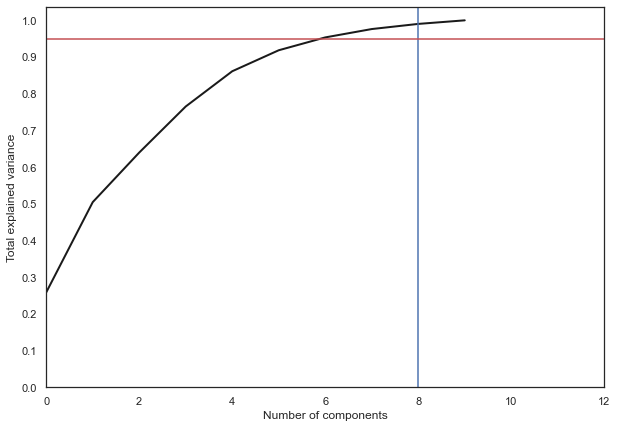

In [37]:
# Apply pca to the scaled train set first

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')


X_scaled = StandardScaler().fit_transform(X_train)

pca = decomposition.PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 12)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(8, c='b') # Tune this so that you obtain at least a 95% total variance explained
plt.axhline(0.95, c='r')
plt.show();

# Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.


In [38]:
# Fit your dataset to the optimal pca
pca1 = decomposition.PCA(n_components=8)
X_pca = pca1.fit_transform(X_scaled)

# 

In [39]:
# You may want to check the results of TSNE also
from sklearn.manifold import TSNE

tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(X_scaled)

In [40]:
from scipy.sparse import csr_matrix, hstack

X_train_last = csr_matrix(hstack([X_pca, X_names_sparse])) # Check with X_tsne + X_names_sparse also

# gridsearchCv: Grid-search is used to find the optimal hyperparameters of a model which results in the most 'accurate' predictions.

In [42]:
# Random Forests second
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': [4, 7, 8, 10], 'min_samples_leaf': [1, 3, 5, 8], 'max_depth': [3, 5, 8]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv1 = GridSearchCV(rfc, parameters, n_jobs=-1, cv=3, verbose=1)
gcv1.fit(X_train_last, y_train)
gcv1.best_estimator_, gcv1.best_score_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


(RandomForestClassifier(max_depth=3, max_features=4, min_samples_leaf=5,
                        n_jobs=-1, oob_score=True, random_state=42),
 0.16666666666666666)

# recommend playlist

In [48]:

# Now build your test set;
# Generate a new dataframe for recommended tracks
# Set recommendation limit as half the Playlist Length per track, you may change this as you like
# Check documentation for  recommendations; https://beta.developer.spotify.com/documentation/web-api/reference/browse/get-recommendations/

rec_tracks = []
cnt = 0 
for i in file['id'].values.tolist():
    print(sp)
    cnt+=1
    rec_tracks += sp.recommendations(seed_tracks=[i], limit=1)['tracks'];
    if cnt==20: 
        break

rec_track_ids = []
rec_track_names = []
for i in rec_tracks:
    rec_track_ids.append(i['id'])
    rec_track_names.append(i['name'])

rec_features = []
for i in range(0,len(rec_track_ids)):
    rec_audio_features = sp.audio_features(rec_track_ids[i])
    for track in rec_audio_features:
        rec_features.append(track)

rec_playlist_df = pd.DataFrame(rec_features, index = rec_track_ids)
rec_playlist_df["songs"] = rec_track_names
rec_playlist_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,songs
6lvsJDZ7336YmpBzcNGhbe,0.520,0.513,7,-7.208,1,0.0256,0.2810,0.00000,0.0976,0.170,77.903,audio_features,6lvsJDZ7336YmpBzcNGhbe,spotify:track:6lvsJDZ7336YmpBzcNGhbe,https://api.spotify.com/v1/tracks/6lvsJDZ7336Y...,https://api.spotify.com/v1/audio-analysis/6lvs...,202213,4,fOoL fOr YoU
4r1CoAATVuxag55Ct3Y1aX,0.627,0.858,7,-3.116,1,0.0394,0.0288,0.00000,0.1990,0.399,100.074,audio_features,4r1CoAATVuxag55Ct3Y1aX,spotify:track:4r1CoAATVuxag55Ct3Y1aX,https://api.spotify.com/v1/tracks/4r1CoAATVuxa...,https://api.spotify.com/v1/audio-analysis/4r1C...,194387,4,I'll Be There
7HdZY9UJTylIiNcSDFyUDc,0.747,0.641,1,-4.502,1,0.0925,0.2500,0.00107,0.1060,0.453,100.028,audio_features,7HdZY9UJTylIiNcSDFyUDc,spotify:track:7HdZY9UJTylIiNcSDFyUDc,https://api.spotify.com/v1/tracks/7HdZY9UJTylI...,https://api.spotify.com/v1/audio-analysis/7HdZ...,186231,4,Miss You (with Major Lazer & Tory Lanez)
1gG5MoWK5SmHUcQPa2jxdP,0.606,0.718,4,-4.094,1,0.0978,0.0320,0.00000,0.4020,0.551,101.821,audio_features,1gG5MoWK5SmHUcQPa2jxdP,spotify:track:1gG5MoWK5SmHUcQPa2jxdP,https://api.spotify.com/v1/tracks/1gG5MoWK5SmH...,https://api.spotify.com/v1/audio-analysis/1gG5...,213307,4,Touch
2P4OICZRVAQcYAV2JReRfj,0.579,0.736,6,-3.863,0,0.0527,0.3100,0.00000,0.1980,0.613,127.999,audio_features,2P4OICZRVAQcYAV2JReRfj,spotify:track:2P4OICZRVAQcYAV2JReRfj,https://api.spotify.com/v1/tracks/2P4OICZRVAQc...,https://api.spotify.com/v1/audio-analysis/2P4O...,230613,4,Waiting For Love


In [51]:
print("predicted songs based on heart rate: ")
rec_playlist_df.songs

predicted songs based on heart rate: 


6lvsJDZ7336YmpBzcNGhbe                                         fOoL fOr YoU
4r1CoAATVuxag55Ct3Y1aX                                        I'll Be There
7HdZY9UJTylIiNcSDFyUDc             Miss You (with Major Lazer & Tory Lanez)
1gG5MoWK5SmHUcQPa2jxdP                                                Touch
2P4OICZRVAQcYAV2JReRfj                                     Waiting For Love
0Zbbxnx4SGGHoIow4PpISP                                           Stargazing
0Zx8khUcEfCFK2AEoIhC92                                          Don't Leave
3GKKCjidbffsVOECWr4eHV                                          No Goodbyes
6vc2Jq2vaGu8z326kSrw92                                 Your Love Is My Drug
3nA9tHmsw5UGMtSIMz4mt7                          Wild Hearts Can't Be Broken
7fOPVfABNLg3sxtgXBhBdp                                             The Plan
4QTuyRQshEZYurtIDfE6g0                                         By Your Side
27Bm0wnZk7NGFGYoTuYM8Y                                    Should've Been Me
2986J0T5CGwJ